In [8]:
!pip install pandas matplotlib seaborn plotly prophet fredapi

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from fredapi import Fred
import plotly.express as px
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

fred = Fred(api_key='e956a3dbccd7d4f90be734f8d55b1d07')

# Features and Target
series_ids = {
    'RSAFS': 'Retail Sales: All Food Services (Target)',
    'CPIAUCSL': 'Consumer Price Index',
    'UNRATE': 'Unemployment Rate',
    'FEDFUNDS': 'Federal Funds Rate',
    'PCE': 'Personal Consumption Expenditures',
    'DSPIC96': 'Real Disposable Personal Income'
}

# Data from FRED
data = pd.DataFrame()
for series_id in series_ids:
    data[series_id] = fred.get_series(series_id)

data.index = fred.get_series('RSAFS').index

data.dropna(inplace=True)

data.rename(columns=series_ids, inplace=True)

data.reset_index(inplace=True)
data.rename(columns={'index': 'ds', 'Retail Sales: All Food Services (Target)': 'y'}, inplace=True)

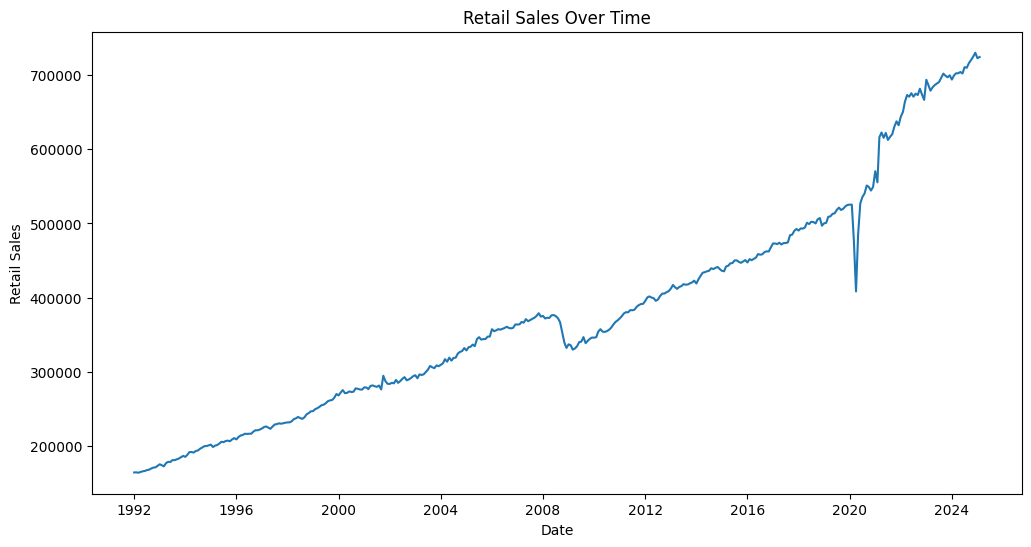

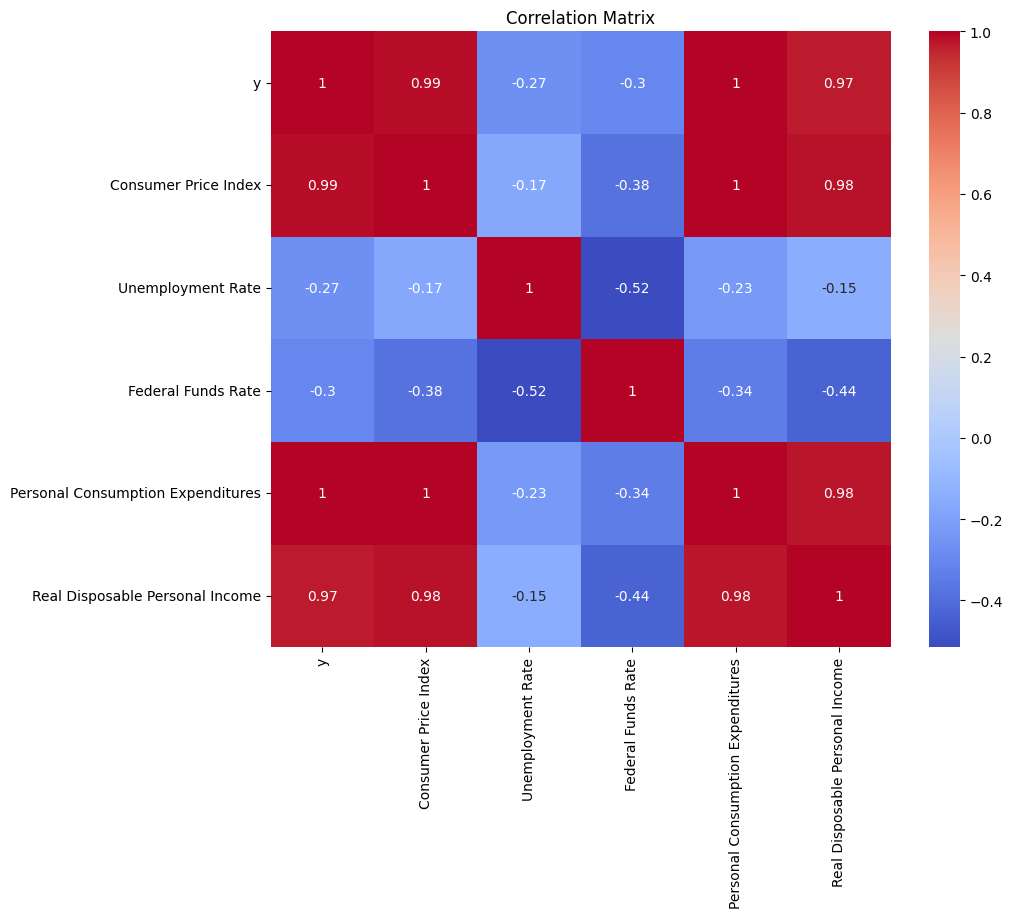

In [10]:
# --- EDA ---

# target variable
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='ds', y='y')
plt.title('Retail Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(columns=['ds']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [11]:
# --- Feature Engineering --- Most methods are no relevant

# lag features
data['lag_1'] = data['y'].shift(1)
data['lag_12'] = data['y'].shift(12)

data['rolling_mean_3'] = data['y'].rolling(window=3).mean()

data.dropna(inplace=True) # clean


